##### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Stochastic Price Models

## Imports

The pandas_datareader library provides very convenient access to financial data. The library requires separate installation by executing the command

    pip install pandas-datareader

in a terminal window, or executign

    !pip install pandas-datareader

in a Jupyter notebook cell.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import datetime
from pandas_datareader import data, wb

## Where to get Price Data

Price data is available from a number of sources. Here we demonstrate the process of obtaining price data on financial goods from [Yahoo Finance](http://finance.yahoo.com/) and [Google Finance](https://www.google.com/finance), and downloading price data sets from [Quandl](http://www.quandl.com/).

### Yahoo Finance

[Yahoo Finance](http://finance.yahoo.com/) provides historical Open, High, Low, Close, and Volume date for quotes on traded securities. In addition, Yahoo Finance provides historical [Adjusted Close](http://marubozu.blogspot.com/2006/09/how-yahoo-calculates-adjusted-closing.html) price data that corrects for splits and dividend distributions. The Adjusted Close is a useful tool for computing the return on long-term investments.

The following cell demonstrates how to download historical Adjusted Close price for a selected security into a pandas DataFrame.

In [15]:
end = datetime.datetime.today().date()
start = end-datetime.timedelta(3*365)
aapl = data.DataReader('AAPL',"yahoo",start,end)['Adj Close']

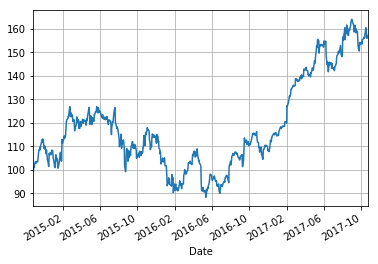

In [17]:
aapl.plot()
plt.grid()

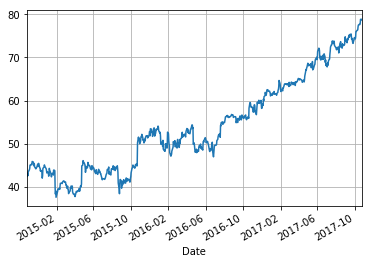

In [19]:
end = datetime.datetime.today().date()
start = end-datetime.timedelta(3*365)
msft = data.DataReader('msft',"yahoo",start,end)['Adj Close']
msft.plot()
plt.grid()

In [21]:
aapl.head().shift(+1)

Date
2014-10-27           NaN
2014-10-28     99.426224
2014-10-29    100.968079
2014-10-30    101.535629
2014-10-31    101.195114
Name: Adj Close, dtype: float64

In [22]:
aapl.head()

Date
2014-10-27     99.426224
2014-10-28    100.968079
2014-10-29    101.535629
2014-10-30    101.195114
2014-10-31    102.159950
Name: Adj Close, dtype: float64

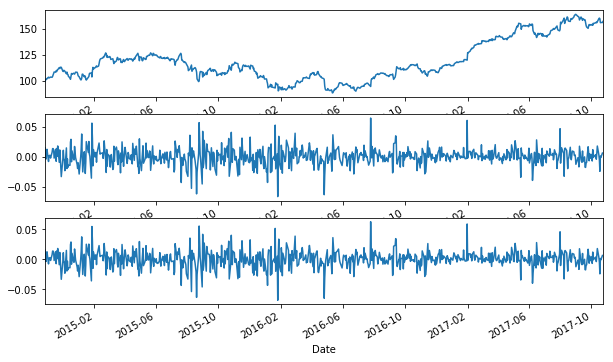

In [28]:
rlin = (aapl/aapl.shift(1) - 1).shift(-1)
rlog = np.log(aapl/aapl.shift(1)).shift(-1)
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
aapl.plot()
plt.subplot(3,1,2)
rlin.plot()
plt.subplot(3,1,3)
rlog.plot()



In [37]:
252*rlog.mean()

0.15314855588345208

In [39]:
252*rlin.std()

3.647402588018688

In [36]:
252*rlin.mean()
252*(rlin.mean() - 0.5*rlin.std()**2)

0.15316666274158447

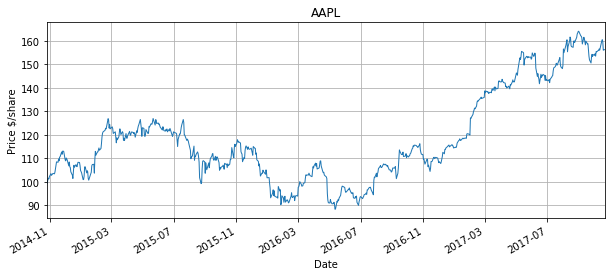

In [36]:
symbol = 'AAPL'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

A = data.DataReader(symbol,"yahoo",start,end)['Adj Close']

plt.figure(figsize=(10,4))
A.plot(lw=1)
plt.title(symbol)
plt.ylabel('Price $/share')
plt.grid()

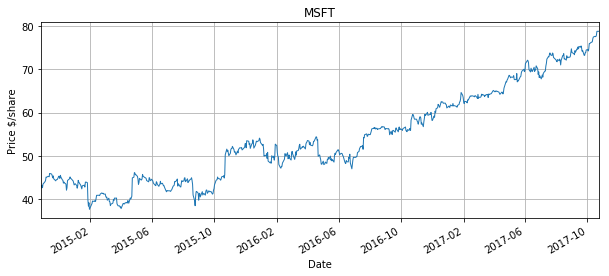

In [40]:
symbol = 'MSFT'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

M = data.DataReader(symbol,"yahoo",start,end)['Adj Close']

plt.figure(figsize=(10,4))
M.plot(lw=1)
plt.title(symbol)
plt.ylabel('Price $/share')
plt.grid()

In [41]:
rlin = M/M.shift(1) - 1
252*rlin.std()

3.562605505844679

In [63]:
rlin = M/M.shift(1) - 1
rlog = np.log(M/M.shift(1)).dropna()
rlog.std()**2

0.00019890986649199037

### Google Finance

[Google Finance](https://www.google.com/finance) provides historical Open, High, Low, Close, and Volume date for quotes on traded securities. The following cell demonstrates how to download historical Close price for a selected security into a pandas DataFrame.

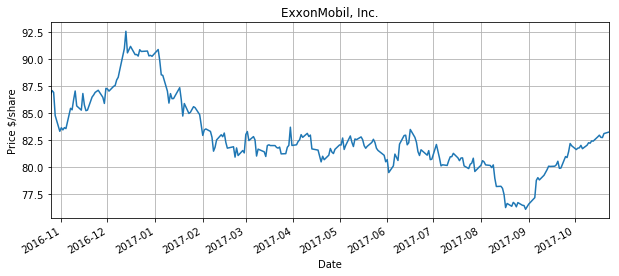

In [35]:
symbol = 'XOM'
description = 'ExxonMobil, Inc.'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

S = data.DataReader(symbol,"google")['Close']

plt.figure(figsize=(10,4))
S.plot()
plt.title(description)
plt.ylabel('Price $/share')
plt.grid()

### Quandl

[Quandl](http://www.quandl.com/) is a searchable source of time-series data on a wide range of commodities, financials, and many other economic and social indicators. Data from Quandl can be downloaded as files in various formats, or accessed directly using the [Quandl API](http://www.quandl.com/help/api) or software-specific package. Here we use demonstrate use of the [Quandl Python package](http://www.quandl.com/help/packages#Python). 

The first step is execute a system command to check that the Quandl package has been installed.

Here are examples of energy datasets. These were found by searching Quandl, then identifying the Quandl code used for accessing the dataset, a description, the name of the field containing the desired price information.

In [16]:
code = 'CHRIS/MCX_CL1'
description = 'NYMEX Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)'
field = 'Close'

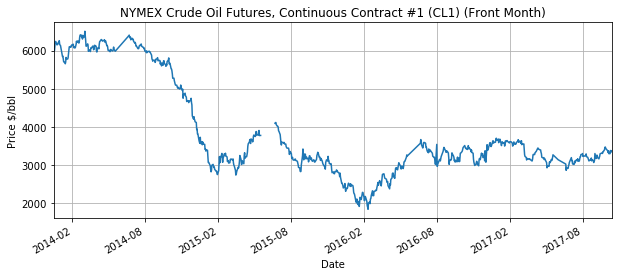

In [17]:
import quandl

end = datetime.datetime.today().date()
start = end - datetime.timedelta(5*365)

S = quandl.get(code, collapse='daily', \
    trim_start=start.isoformat(), trim_end=end.isoformat())[field]

plt.figure(figsize=(10,4))
S.plot()
plt.title(description)
plt.ylabel('Price $/bbl')
plt.grid()

## Returns

The statistical properties of financial series are usually studied in terms of the change in prices. There are several reasons for this, key among them is that the changes can often be closely approximated as stationary random variables whereas prices are generally non-stationary sequences. 

A common model is 

$$S_{t+1} = R_{t} S_{t}$$

so, recursively,

$$S_{t+1} = R_{t} R_{t-1} \cdots R_{0} S_{0}$$

### Compounded (Log) Returns

Compounded, or log returns, are defined as

$$r^{log}_{t} = \log R_t = \log \frac{S_{t+1}}{S_{t}}$$

The log returns have a very useful compounding property for aggregating price changes across time

$$ \log \frac{S_{t+k}}{S_{t}} = r^{log}_{t} + r^{log}_{t+1} + \cdots + r^{log}_{t+k-1}$$

If the compounded returns are statistically independent and identically distributed, then this property provides a means to aggregate returns and develop statistical price projections.

### Linear Returns

Linear, or arithmetic returns, are defined as

$$S_{t+1} = \left(1 + r^{lin}_{t+1}\right) S_{t}$$

so that 

$$r^{lin}_{t} = \left(\frac{S_{t+1}}{S_{t}} - 1\right) = R_{t} - 1$$

Linear returns can be aggregated across a portfolio. Consider a portfolio composed of $N$ different assets that holds $x_{t,n}$ units of asset $n$ at time $t$. The value of portfolio at time $t$ is

$$W_t = x_{t,n} S_{t,1} + x_{t,n} S_{t,2} + \cdots x_{t,N} S_{t,N}$$

The value of the portfolio at time $t+1$ (before any rebalancing) is given by

$$\begin{align*}
W_{t+1} & = x_{t,1} S_{t+1,1} + x_{t,2} S_{t+1,2} + \cdots x_{t,N} S_{t+1,N} \\
& = x_{t,1}(1+r^{lin}_{t,1})S_{t,1} + x_{t,2}(1+r^{lin}_{t,2})S_{t,2} + \cdots + x_{t,N}(1+r^{lin}_{t,N})S_{t,N} \\
& = W_{t} + r^{lin}_{t,1}x_{t,1}S_{t,1} + r^{lin}_{t,2}x_{t,2}S_{t,2} + \cdots + r^{lin}_{t,N}x_{t,N}S_{t,N}
\end{align*}$$

Defining $w_{t,n}$ as the fraction of the portfolio's value invested in asset $n$ at time $t$

$$w_{t,n} = \frac{x_{t,n}S_{t,n}}{W_t}$$

gives the final result

$$\begin{align*}
r^{lin}_{t,W} & = \frac{W_{t+1}}{W_t} - 1 \\
& = w_{t,1}r^{lin}_{t,1} + w_{t,2}r^{lin}_{t,2} + \cdots + w_{t,N}r^{lin}_{t,N}
\end{align*}$$

showing that the linear return on the portfolio is a weighted linear sum of the linear returns on the individual assets.

### Volatility Drag and the Relationship between Linear and Log Returns

For long-term financial decision making, it's important to understand the relationship between $r_t^{log}$ and $r_t^{lin}$. Algebraically, the relationships are simple.

$$r^{log}_t = \log \left(1+r^{lin}_t\right)$$

$$r^{lin}_t = e^{r^{log}_t} - 1$$

The linear return $r_t^{lin}$ is the fraction of value that is earned from an asset in a single period. It is a direct measure of earnings. The average value $\bar{r}^{lin}$ over many periods this gives the average fractional earnings per period. If you care about consuming the earnings from an asset and not about growth in value, then $\bar{r}^{lin}$ is the quantity of interest to you.

Log return $r_t^{log}$ is the rate of growth in value of an asset over a single period. When averaged over many periods, $\bar{r}^{log}$ measures the compounded rate of growth of value. If you care about the growth in value of an asset, then $\bar{r}^{log}$ is the quantity of interest to you.

The compounded rate of growth $r_t^{log}$ is generally smaller than average linear return $\bar{r}^{lin}$ due to the effects of volatility. To see this, consider an asset that has a linear return of -50% in period 1, and +100% in period 2. The average linear return is would be +25%, but the compounded growth in value would be 0%.

A general formula for the relationship between $\bar{r}^{log}$ and $\bar{r}^{lin}$ is derived as follows:

$$\begin{align*}
\bar{r}^{log} & = \frac{1}{T}\sum_{t=0}^{T-1} r_t^{log} \\
& = \frac{1}{T}\sum_{t=0}^{T-1} \log\left(1+r_t^{lin}\right) \\
& = \frac{1}{T}\sum_{t=0}^{T-1} \left(\log(1) + r_t^{lin} - \frac{1}{2} (r_t^{lin})^2 + \cdots
\right) \\
& = \frac{1}{T}\sum_{t=0}^{T-1} r_t^{lin} - \frac{1}{2}\frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin})^2 + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left(\frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin})^2\right) + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left((\bar{r}^{lin})^2 + \frac{1}{T}\sum_{t=0}^{T-1} (r_t^{lin}-\bar{r}^{lin})^2\right) + \cdots
\end{align*}$$

For typical values $\bar{r}^{lin}$ of and long horizons $T$, this results in a formula

$$\begin{align*}
\bar{r}^{log} & \approx \bar{r}^{lin} - \frac{1}{2} \left(\sigma^{lin}\right)^2
\end{align*}$$

where $\sigma^{lin}$ is the standard deviation of linear returns, more commonly called the volatility.

The difference $- \frac{1}{2} \left(\sigma^{lin}\right)^2$ is the _volatility drag_ imposed on the compounded growth in value of an asset due to volatility in linear returns. This can be significant and a source of confusion for many investors. 

It's indeed possible to have a positive average linear return, but negative compounded growth.  To see this, consider a \$100 investment which earns 20% on even-numbered years, and loses 18% on odd-numbered years. The average linear return is 1%, and the average log return is -0.81%.



### Computing Linear and Log Returns

Given the price data stored as a pandas `DataSeries` `S`, a corresponding data series for returns is computed using the pandas `shift()` function, followed by the `dropna()` function to remove missing values.

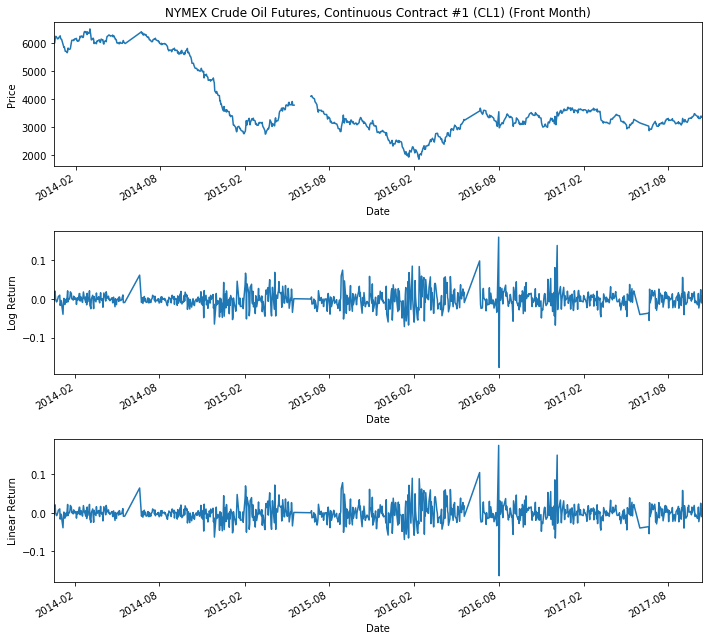

In [18]:
rLog = (np.log(S/S.shift(+1))).dropna()
rLin = (S/S.shift(+1)).dropna() - 1.0

plt.figure(figsize=(10,9))
plt.subplot(3,1,1)
S.plot()
plt.ylabel('Price')
plt.title(description)

plt.subplot(3,1,2)
rLog.plot()
plt.ylabel('Log Return')

plt.subplot(3,1,3)
rLin.plot()
plt.ylabel('Linear Return')

plt.tight_layout()

In [20]:
print("Mean Linear Return = {0:.6f}".format(rLin.mean()))
print("Linear Volatility = {0:.6f}".format(rLin.std()))
print("Volatility Drag -0.5*vol**2 = {0:.6f}".format(-0.5*rLin.std()**2))
print("rLin - 0.5*vol = {0:.6f}\n".format(rLin.mean() - 0.5*rLin.std()**2))

print("Mean Log Return = {0:.6f}".format(rLog.mean()))

Mean Linear Return = -0.000468
Linear Volatility = 0.023678
Volatility Drag -0.5*vol**2 = -0.000280
rLin - 0.5*vol = -0.000749

Mean Log Return = -0.000746


## Statistical Properties of Returns

### Distribution of Returns

A basic assumption in developing developing stochastic price models is that the residuals are indepdendent and identically distributed (i.i.d.) random variates.  Here we show the results of several common statistical tests that would screen out non-i.i.d. random variates.

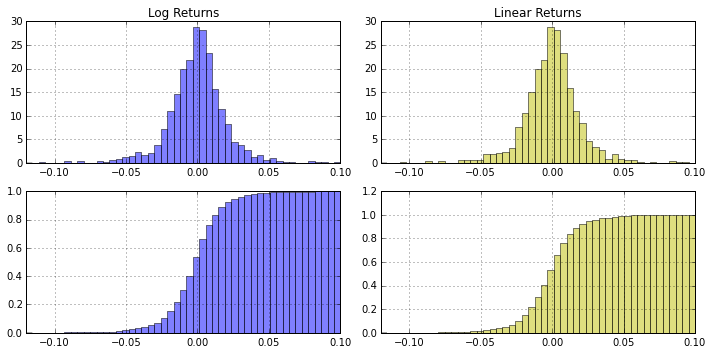

In [10]:
bins = np.linspace(-0.12,0.10,50)
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
rLog.hist(bins=bins, normed=True, color='b', alpha=0.5)
plt.xlim(bins.min(),bins.max())
plt.title('Log Returns')

plt.subplot(2,2,3)
rLog.hist(bins=bins, normed=True, cumulative=True, color='b',alpha=0.5)
plt.xlim(bins.min(),bins.max())

plt.subplot(2,2,2)
rLin.hist(bins=bins, normed=True, color='y', alpha=0.5)
plt.xlim(bins.min(),bins.max())
plt.title('Linear Returns')

plt.subplot(2,2,4)
rLin.hist(bins=bins, normed=True, cumulative=True, color='y',alpha=0.5)
plt.xlim(bins.min(),bins.max())

plt.tight_layout()

### Distribution of First Half versus Second Half of the Data Set

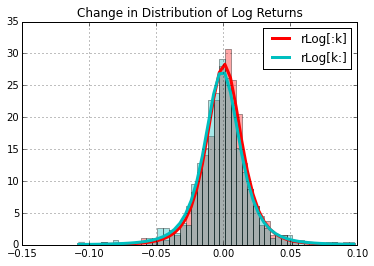

In [11]:
from scipy.stats import t

k = int(len(rLog)/2)
r = np.linspace(rLog.min(),rLog.max())

plt.figure();
plt.hold(True)

param = t.fit(rLog[:k])
rLog[:k].hist(bins=r,normed=1,alpha=0.35,color='r')
plt.plot(r,t.pdf(r,df=param[0],loc=param[1],scale=param[2]),'r-',lw=3);

rLog[k:].hist(bins=r,normed=1,alpha=0.35,color='c')
param = t.fit(rLog[k:])
plt.plot(r,t.pdf(r,df=param[0],loc=param[1],scale=param[2]),'c-',lw=3);
plt.hold(False)

plt.legend(['rLog[:k]','rLog[k:]'])
plt.title('Change in Distribution of Log Returns')

### Lag Plot of $r^{log}_{t+1}$ versus $r^{log}_t$

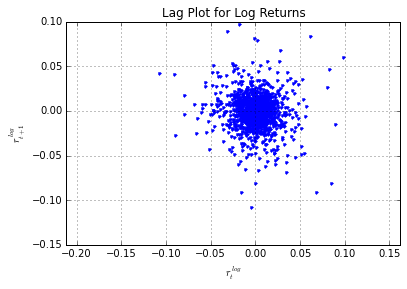

In [12]:
plt.plot(rLog[0:-1],rLog[1:],'.')
plt.axis('equal');
plt.xlabel('$r^{log}_{t}$')
plt.ylabel('$r^{log}_{t+1}$')
plt.grid()
plt.title('Lag Plot for Log Returns');

### Autocorrelation

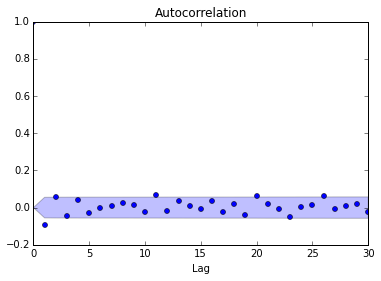

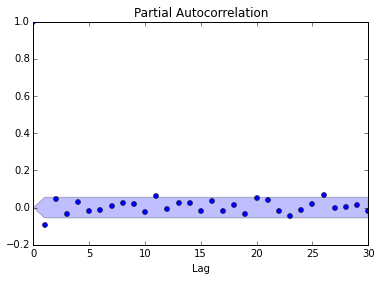

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(rLog,lags=min(30,len(rLog)));
plt.xlabel('Lag');
plot_pacf(rLog,lags=min(30,len(rLog)));
plt.xlabel('Lag');

## Price Forecasting using the Bootstrap

We have computed return as

$$r^{log}_{t} = \log \frac{S_{t+1}}{S_{t}} = \log R_t$$

$$r^{lin}_{t} = \frac{S_{t+1} - S_{t}}{S_{t}} = R_t - 1$$

and executed several tests of the hypothesis that $r^L_k$ behaves as independent, identically distributed (i.i.d.) random variable. If we're satisfied with this hypothesis, then we can randomly sample the historical return data $r^L_k$ to simulate future prices.  This bootstrap technique is relatively simple to implement as shown below.

In [14]:
from dateutil import rrule 
import datetime

def tradingDates(start_date=datetime.date.today(), 
                 end_date=datetime.date.today()+datetime.timedelta(days=92)):
    rs = rrule.rruleset()
    rs.rrule(rrule.rrule(rrule.DAILY, dtstart=start_date, until = end_date, 
                         byweekday=(rrule.MO,rrule.TU,rrule.WE,rrule.TH,rrule.FR)))
    rs.exdate(datetime.datetime(2015, 1,1))     # New Years Day
    rs.exdate(datetime.datetime(2015, 1,19))    # Martin Luther King Day
    rs.exdate(datetime.datetime(2015, 2,16))    # Washington's Birthday
    rs.exdate(datetime.datetime(2015, 4, 3))    # Good Friday
    rs.exdate(datetime.datetime(2015, 5,25))    # Memorial Day
    rs.exdate(datetime.datetime(2015, 7, 3))    # Independence Day
    rs.exdate(datetime.datetime(2015, 9, 7))    # Labor Day
    rs.exdate(datetime.datetime(2015,11,26))    # Thanksgiving Day
    rs.exdate(datetime.datetime(2015,12,25))    # Christmas Day
    rs.exdate(datetime.datetime(2016, 1, 1))    # New Years Day
    rs.exdate(datetime.datetime(2016, 1,18))    # Martin Luther King Day
    rs.exdate(datetime.datetime(2016, 2,15))    # Washington's Birthday
    rs.exdate(datetime.datetime(2016, 3,25))    # Good Friday
    rs.exdate(datetime.datetime(2016, 5,30))    # Memorial Day
    rs.exdate(datetime.datetime(2016, 7, 4))    # Independence Day
    rs.exdate(datetime.datetime(2016, 9, 5))    # Labor Day
    rs.exdate(datetime.datetime(2016,11,24))    # Thanksgiving Day
    rs.exdate(datetime.datetime(2016,12,26))    # Christmas Day
    return rs

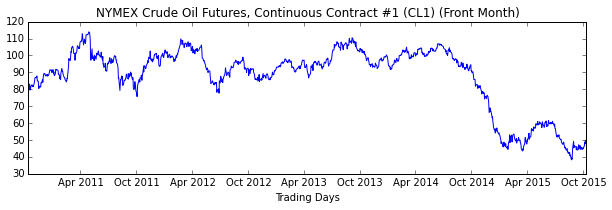

In [15]:
from scipy.stats import lognorm

N = 400
#start_date = S.index[-252]
start_date = S.index[-1]
end_date = datetime.date.today() + datetime.timedelta(days=365)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)

plt.plot(S.index,S)
plt.title(description)
plt.xlabel('Trading Days')

# Initialize P using the last available price
P = np.array([S.ix[start_date]]*N)

In [16]:
# The generator returns one array of N random samples from the history of total returns
# for each t in the history of future horizon.
R = (S/S.shift(+1)).dropna()
R

Date
2010-10-15    0.982586
2010-10-18    1.022523
2010-10-19    0.956789
2010-10-20    1.028683
2010-10-21    0.985202
2010-10-22    1.014027
2010-10-25    1.010160
2010-10-26    1.000364
2010-10-27    0.992611
2010-10-28    1.002929
2010-10-29    0.990874
2010-11-01    1.018666
2010-11-02    1.011453
2010-11-03    1.009416
2010-11-04    1.021254
2010-11-05    1.004162
2010-11-08    1.002418
2010-11-09    0.996095
2010-11-10    1.012569
2010-11-11    1.000000
2010-11-12    0.966633
2010-11-15    0.999764
2010-11-16    0.970304
2010-11-17    0.976925
2010-11-18    1.017529
2010-11-19    0.995846
2010-11-22    1.002822
2010-11-23    0.994005
2010-11-24    1.032123
2010-11-26    0.998808
                ...   
2015-08-31    1.088014
2015-09-01    0.922967
2015-09-02    1.018498
2015-09-03    1.010811
2015-09-04    0.985027
2015-09-08    0.997611
2015-09-09    0.961036
2015-09-10    1.040091
2015-09-11    0.971908
2015-09-14    0.985884
2015-09-15    1.013409
2015-09-16    1.057412
2015-0

In [17]:
R = R.ix[0:start_date]

TypeError: cannot do slice indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [0] of <type 'int'>

TypeError: cannot do slice indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [0] of <type 'int'>

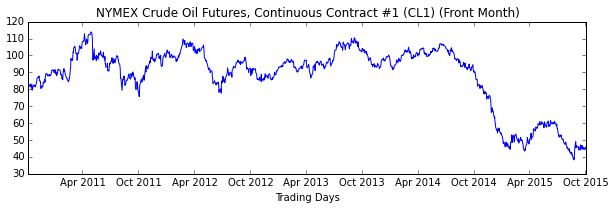

In [18]:
Zgenerator = ((d,np.array([np.random.choice(R) for _ in xrange(N)])) 
                for d in tradingDates(start_date,end_date))

plt.hold(True)

for d,Z in Zgenerator:
    P *= Z
    plt.plot([d]*N,P,'r.',ms=0.1,alpha=0.6)
    plt.plot(d,np.percentile(P,50),'g.',ms=1,alpha=0.6)
    plt.plot(d,np.percentile(P,2.5),'g.',ms=0.75,alpha=0.6)
    plt.plot(d,np.percentile(P,97.5),'g.',ms=0.75,alpha=0.6)
    
plt.hold(False)
plt.grid()
plt.ylim(0,plt.ylim()[1])

# Histogram

plt.subplot(2,2,3)
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(P,bins=nbins,normed=1,alpha=0.35,color='b');

plt.hold(True)
shape,loc,scale = lognorm.fit(P,floc=0)
x=np.linspace(0,max(P),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale) # fitted distribution
plt.plot(x,pdf_fitted,'b-',lw=3)
p = np.mean(P)
ylim = plt.ylim()
plt.plot([p,p],ylim,'r--',lw=2)
plt.ylim(ylim)
plt.text(p,0.97*ylim[1],"  Mean = {0:.2f}".format(p),va = 'top')
plt.hold(False)

plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Price Distribution for {1}".format(description,d.strftime("%b %d %Y")))

# Cumulative Distribution

plt.subplot(2,2,4)
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(P,bins=nbins,normed=1,cumulative=True,alpha=0.35,color='b');
plt.xlim(min(P),max(P))
plt.xlabel('Final Price')
plt.ylabel('Probability');
plt.title("Cumulative Distribution for {1}".format(description,d.strftime("%b %d %Y")))

plt.hold(True)
xtext = min(P) + 0.05*(max(P)-min(P))

p = 0.025
x = np.percentile(P,100*p)
plt.text(xtext,p+0.02,'{0:.2f}'.format(x),ha='left')
plt.plot([0,x,x],[p,p,0],'r--',lw=2)

p = 0.50
x = np.percentile(P,100*p)
plt.text(xtext,p+0.02,'{0:.2f}'.format(x),ha='left')
plt.plot([0,x,x],[p,p,0],'r--',lw=2)

p = 0.975
x = np.percentile(P,100*p)
plt.text(xtext,p-0.02,'{0:.2f}'.format(x),ha='left',va='top')
plt.plot([0,x,x],[p,p,0],'r--',lw=2)

plt.hold(False)
plt.grid()
plt.tight_layout()

## Fitting Returns to a Distribution

### Normal Distribution

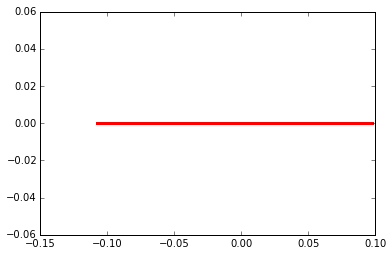

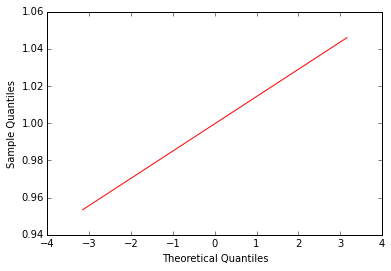

In [15]:
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

r = np.linspace(rLog.min(),rLog.max())

plt.figure()
param = norm.fit(R)
rLog.hist(bins=int(1.5*np.sqrt(len(rLog))),normed=1,alpha=0.4)
plt.plot(r,norm.pdf(r,loc=param[0],scale=param[1]),'r-',lw=3)

plt.figure()
qqplot(R,line='q');

### t-Distribution

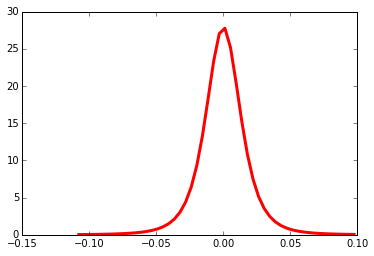

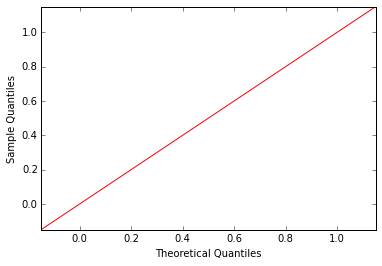

In [16]:
from scipy.stats import t
from statsmodels.graphics.gofplots import qqplot

r = np.linspace(rLog.min(),rLog.max())

plt.figure();
param = t.fit(rLog)
rLog.hist(bins=int(1.5*np.sqrt(len(rLog))),normed=1,alpha=0.4);
plt.plot(r,t.pdf(r,df=param[0],loc=param[1],scale=param[2]),'r-',lw=3);

plt.figure();
qqplot(R,dist=t,distargs=(param[0],), loc=param[1], scale=param[2], line='45');


## Geometric Brownian Motion

$$S_{k+1} = S_k + \alpha h S_k + \beta \sqrt{h} S_k Z_k$$

where $Z_k \sim N(0,1)$ and $h$ corresponds to a sampling period of 1 'trading day'. There are typically 252 trading days in a calendar year, 63 trading days in a quarter, and 21 trading days in a month.

Defining return as

$$r^S_{k} = \frac{S_k - S_{k-1}}{S_{k-1}} = \alpha h + \beta \sqrt{h} Z_k$$

then the statistical model for $R_k$ becomes

$$r^S_{k} = \alpha h + \beta \sqrt{h} Z_k$$

For the case of Geometric Brownian Motion the hypothesis is that $r^S_k$ is a random variable drawn from a the normal distribution $r^S_k \sim N(\alpha h, \beta\sqrt{h}$).

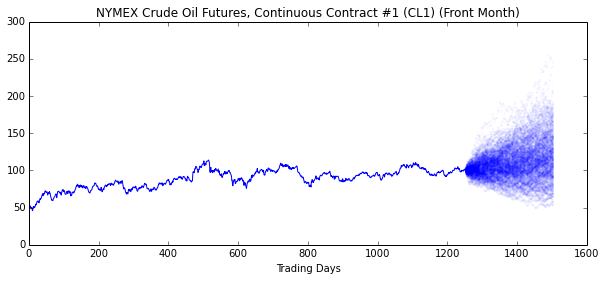

In [14]:
from scipy.stats import norm

figure(figsize=(10,4))
plot(S)
title(description)
xlabel('Trading Days')

N = 200    # number of realizations
T = 252    # simulation time horizon in trading days
h = 1      # time step in trading days

param = norm.fit(R)
alpha = param[0]/h
beta = param[1]/sqrt(h)

# Initialize P
P = array([S[-1]]*N)

# generator of random variates
Zgenerator = (array(norm.rvs(loc=alpha*h,scale=beta*sqrt(h),size=N)) for k in range(0,T))

k = len(S)
for Z in Zgenerator:
    k += 1
    P += P*Z
    plot([k]*N,P,'b.',ms=0.1)

### Forecast Assuming a Normal Distribution of Returns

0.287147332863 0 112.939532061


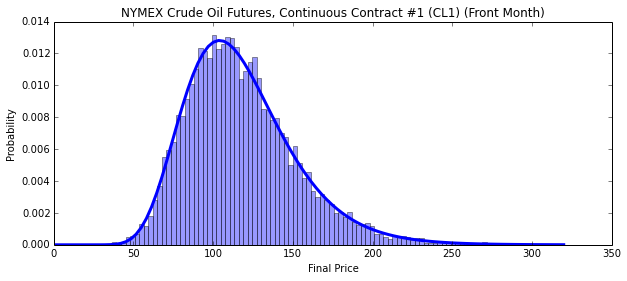

In [15]:
from scipy.stats import norm,lognorm

param = norm.fit(R)
alpha = param[0]
beta = param[1]

N = 10000
T = 252
h = 1

# Initialize P
Pgbm = array([S[-1]]*N)

# generator of random variates
Zgenerator = (array(norm.rvs(loc=alpha*h,scale=beta*sqrt(h),size=N)) for k in range(0,T))

for Z in Zgenerator:
    Pgbm += Pgbm*Z
    
figure(figsize=(10,4))
nbins = min(100,int(1.5*sqrt(N)))
hist(Pgbm,bins=nbins,normed=1,alpha=0.4,color='b');

shape,loc,scale = lognorm.fit(Pgbm,floc=0)
print shape,loc,scale
x=np.linspace(0,max(Pgbm),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale) # fitted distribution
plot(x,pdf_fitted,'b-',lw=3)
xlabel('Final Price')
ylabel('Probability');
title(description)

### Forecast Assuming a t-Distribution of Returns

0.292709661642 0 117.466994346


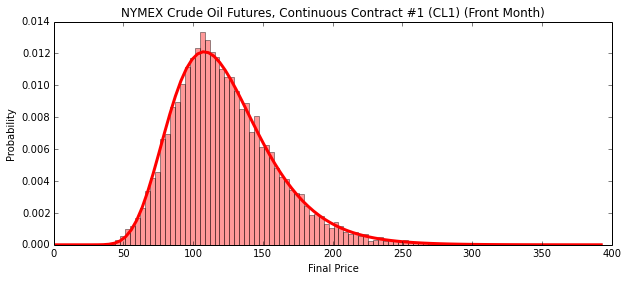

In [16]:
from scipy.stats import t,lognorm

param = t.fit(R)
df = param[0]
alpha = param[1]
beta = param[2]

N = 10000
T = 252
h = 1

# Initialize P
Pgtm = array([S[-1]]*N)

# generator of random variates
Zgenerator = (array(t.rvs(df,loc=alpha*h,scale=beta*sqrt(h),size=N)) for k in range(0,T))

for Z in Zgenerator:
    Pgtm += Pgtm*Z

figure(figsize=(10,4))
nbins = min(100,int(1.5*sqrt(N)))
hist(Pgtm,bins=nbins,normed=1,alpha=0.4,color='r');

shape,loc,scale = lognorm.fit(Pgtm,floc=0)
print shape,loc,scale
x=np.linspace(0,max(Pgtm),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale) # fitted distribution
plot(x,pdf_fitted,'r-',lw=3)
xlabel('Final Price')
ylabel('Probability');
title(description)

## Regressing Returns to Alternative Models

In [7]:
df = pd.DataFrame({'S':S,'R':R}, index = R.index)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5004
Date:                Wed, 02 Apr 2014   Prob (F-statistic):              0.479
Time:                        18:35:38   Log-Likelihood:                 3236.8
No. Observations:                1251   AIC:                            -6470.
Df Residuals:                    1249   BIC:                            -6459.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0098      0.015     -0.661      0.509        -0.039     0.019
LnS            0.0023      0.003      0.707      0.4

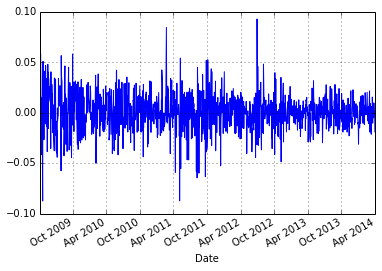

In [13]:
df = pd.DataFrame({'Price':S,'LnS':log(S),'Return':R})
df = df[~isnan(df['Return'])]
#plot(df['LnS'],df['Return'],'.')

import statsmodels.api as sm
df = sm.add_constant(df)
mod = sm.OLS(df['Return'],df[['const','LnS']])
res = mod.fit()
print res.summary()
print res.params
res.resid.plot()